In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [11]:
df = pd.read_csv('data/loan_data (2).csv')

# Show basic info
print(df.info())
print(df.describe())
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
       credit.policy     int.rate  installment  log.annual

In [16]:
# preprocessing
le = LabelEncoder()

# Fit and transform the 'purpose' column
df['purpose_encoded'] = le.fit_transform(df['purpose'])

# Save or view the result
print(df.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  purpose_encoded  
0        

In [18]:
df = df.drop('purpose', axis=1)
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_encoded  
0        0               0                2  
1        0        

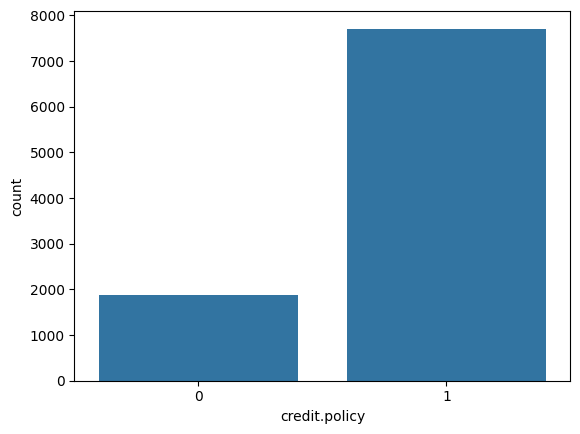

In [17]:
# Visualize target distribution 
sns.countplot(x='credit.policy', data=df)
plt.show()

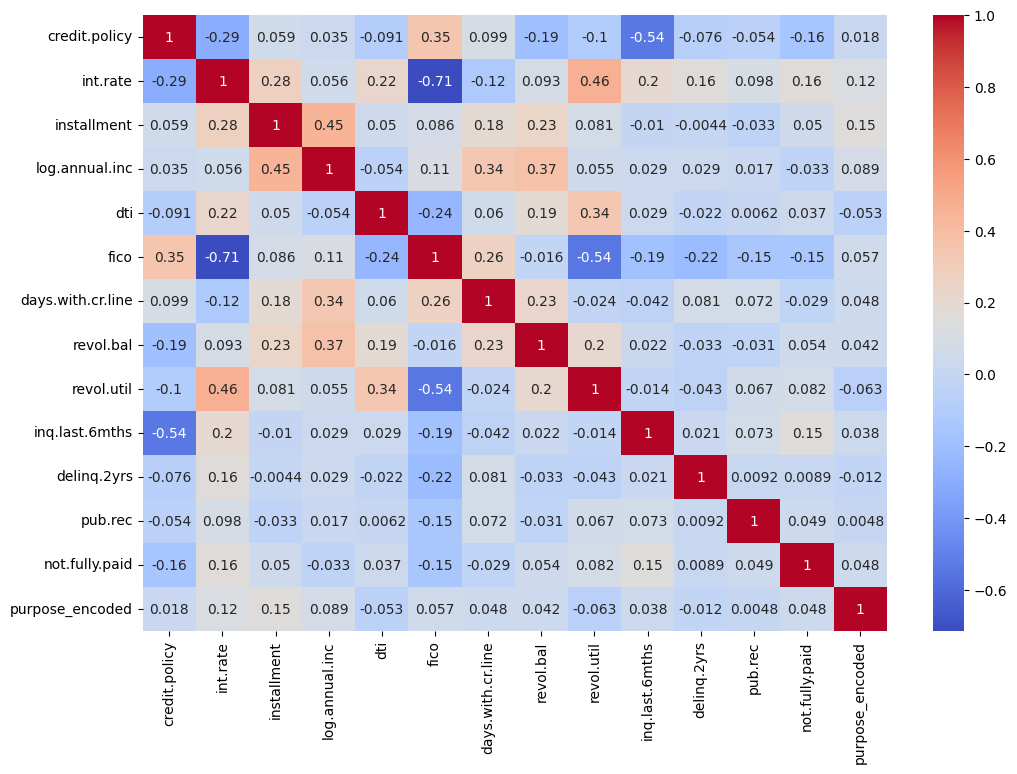

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(12, 8)) # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

In [32]:
X = df.drop('credit.policy', axis=1)
y = df['credit.policy']

In [63]:
num_cols = X.select_dtypes(include='number').columns
print("Numeric columns:", num_cols)
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
print("Scaled numeric columns:", X[num_cols].head())

Numeric columns: Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid', 'purpose_encoded'],
      dtype='object')
Scaled numeric columns:    int.rate  installment  log.annual.inc       dti      fico  \
0 -0.139318     2.463099        0.680388  0.998505  0.688825   
1 -0.578868    -0.438854        0.244031  0.244540 -0.101303   
2  0.486484     0.230708       -0.908659 -0.141885 -0.759742   
3 -0.813544    -0.757022        0.680388 -0.654697  0.030385   
4  0.743509    -1.043992        0.597961  0.343326 -1.154806   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.432230   0.353732    0.182704       -0.716989    -0.299730   
1          -0.721230   0.495018    1.030602       -0.716989    -0.299730   
2           0.059770  -0.397073   -0.730683       -0.262470    -0.299730   
3          -0.745277   0.496321    0.

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [58]:
print(X.shape[1])

13


In [80]:
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01) ),
    # layers.Dropout(0.3),
    layers.Dense(32, activation='relu',  kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)



In [81]:
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8019 - loss: 0.9873 - val_accuracy: 0.8917 - val_loss: 0.5335
Epoch 2/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8877 - loss: 0.4842 - val_accuracy: 0.9022 - val_loss: 0.3638
Epoch 3/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9042 - loss: 0.3497 - val_accuracy: 0.9074 - val_loss: 0.3082
Epoch 4/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9136 - loss: 0.2901 - val_accuracy: 0.9106 - val_loss: 0.2798
Epoch 5/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9079 - loss: 0.2790 - val_accuracy: 0.9132 - val_loss: 0.2700
Epoch 6/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9210 - loss: 0.2670 - val_accuracy: 0.9119 - val_loss: 0.2585
Epoch 7/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9151 - loss: 0.2596 - val_accuracy: 0.9230 - val_loss: 0.2516
Epoch 8/30
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9222 - loss: 0.2450 - val_accuracy: 0

In [82]:
# Evaluate on separate test set (not used during training)
test_loss, test_accuracy = model.evaluate(X_val, y_val)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9529 - loss: 0.1867

Test Accuracy: 0.9436
Test Loss: 0.1989


In [83]:
# Save the model
model.save('loan_model.h5')
